In [6]:
import numpy as np
import pandas as pd
from scipy.signal import correlate
import plotly.graph_objects as go

In [7]:
merged1 = pd.read_csv('/home/nivelrios/documentos/Mburicao Project/data/external/aisp_local_nivel_merged.csv', index_col=0, parse_dates=True)
merged2 = pd.read_csv('/home/nivelrios/documentos/Mburicao Project/data/external/snd_local_nivel_merged.csv', index_col=0, parse_dates=True)
merged3 = pd.read_csv('/home/nivelrios/documentos/Mburicao Project/data/external/sil_nivel_merged.csv', index_col=0, parse_dates=True)

In [8]:
merged1_copy = merged1.copy()
merged1_copy['aisp_std'] = (merged1_copy['aisp'] - merged1_copy['aisp'].mean()) / merged1['aisp'].std()
merged1_copy['nivel_std'] = (merged1_copy['nivel'] - merged1_copy['nivel'].mean()) / merged1['nivel'].std()
merged1_real=merged1_copy[['aisp', 'nivel']]
merged1_std=merged1_copy[['aisp_std', 'nivel_std']]

merged2_copy = merged2.copy()
merged2_copy['snd_std'] = (merged2_copy['snd'] - merged2_copy['snd'].mean()) / merged2['snd'].std()
merged2_copy['nivel_std'] = (merged2_copy['nivel'] - merged2_copy['nivel'].mean()) / merged2['nivel'].std()
merged2_real=merged2_copy[['snd', 'nivel']]
merged2_std=merged2_copy[['snd_std', 'nivel_std']]

merged3_copy = merged3.copy()
merged3_copy['sil_std'] = (merged3_copy['sil'] - merged3_copy['sil'].mean()) / merged3['sil'].std()
merged3_copy['nivel_std'] = (merged3_copy['nivel'] - merged3_copy['nivel'].mean()) / merged3['nivel'].std()
merged3_real=merged3_copy[['sil', 'nivel']]
merged3_std=merged3_copy[['sil_std', 'nivel_std']]

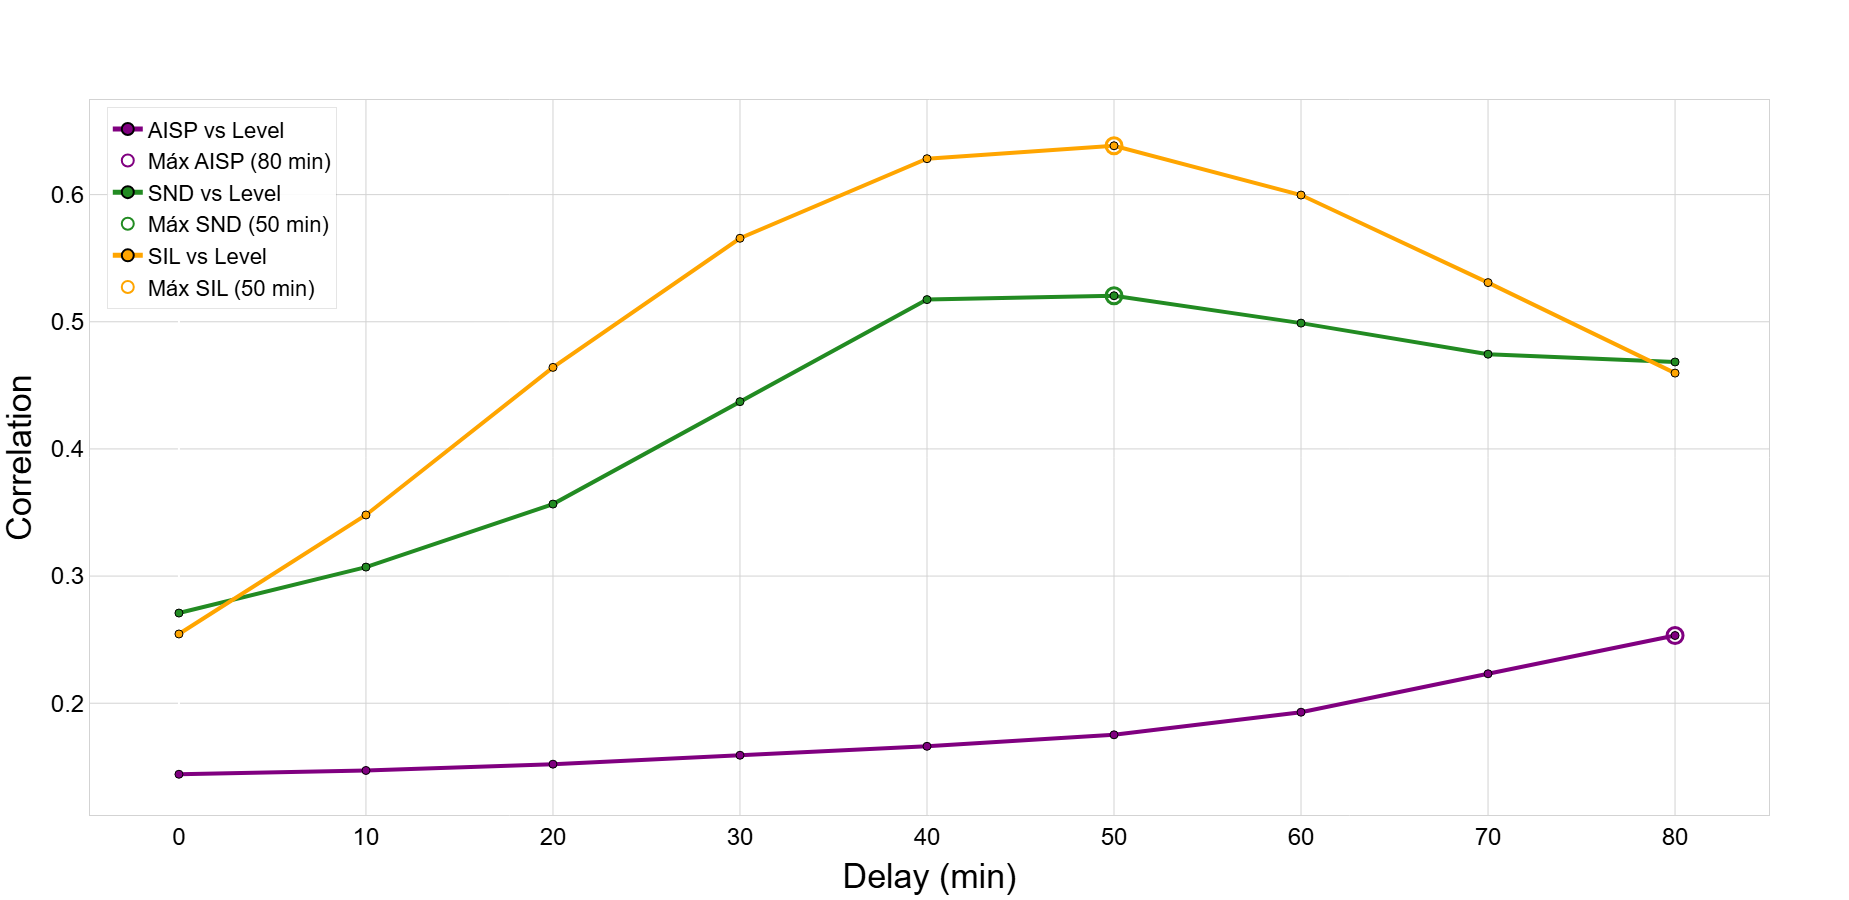

In [12]:
def cross_correlation(x, y, lag_step=10, min_delay=0, max_delay=80):
    corr = correlate(x, y, mode='full')
    lags = np.arange(-len(x) + 1, len(x))
    norm_factor = np.array([len(x) - abs(lag) for lag in lags])
    corr_norm = corr / norm_factor
    lags_minutes = lags * lag_step

    mask = (lags_minutes >= min_delay) & (lags_minutes <= max_delay)
    lags_minutes_filtered = lags_minutes[mask]
    corr_norm_filtered = corr_norm[mask]

    best_idx = np.argmax(np.abs(corr_norm_filtered))
    best_lag = lags_minutes_filtered[best_idx]
    best_corr = corr_norm_filtered[best_idx]

    return lags_minutes_filtered, corr_norm_filtered, best_lag, best_corr

# Extraer las señales
nivel1 = merged1_std['nivel_std'].values
aisp = merged1_std['aisp_std'].values
nivel2 = merged2_std['nivel_std'].values
snd = merged2_std['snd_std'].values
nivel3 = merged3_std['nivel_std'].values
sil = merged3_std['sil_std'].values

# Calcular las correlaciones
lags_aisp, corr_aisp, lag_aisp, corr_max_aisp = cross_correlation(nivel1, aisp)
lags_snd, corr_snd, lag_snd, corr_max_snd = cross_correlation(nivel2, snd)
lags_sil, corr_sil, lag_sil, corr_max_sil = cross_correlation(nivel3, sil)

# Crear la figura
fig = go.Figure()

fig.add_trace(go.Scatter(x=lags_aisp, y=corr_aisp, mode='lines+markers', name='AISP vs Level',marker=dict(size=8, color='purple', line=dict(width=1, color='black')), line=dict(width=4, color='purple')))
fig.add_trace(go.Scatter(
    x=[lag_aisp], y=[corr_max_aisp],
    mode='markers',
    name=f'Máx AISP ({lag_aisp} min)',
     marker=dict(
        size=16,
        color='purple',
        symbol='circle-open',
        line=dict(color='purple', width=3)
    
    )
))

fig.add_trace(go.Scatter(x=lags_snd, y=corr_snd, mode='lines+markers', name='SND vs Level', marker=dict(size=8, color='forestgreen', line=dict(width=1, color='black')), line=dict(width=4, color='forestgreen')))
fig.add_trace(go.Scatter(
    x=[lag_snd], y=[corr_max_snd],
    mode='markers',
    name=f'Máx SND ({lag_snd} min)',
    marker=dict(
        size=16,
        color='forestgreen',
        symbol='circle-open',
        line=dict(color='forestgreen', width=3)
    )
))

fig.add_trace(go.Scatter(x=lags_sil, y=corr_sil, mode='lines+markers', name='SIL vs Level',marker=dict(size=8, color='orange', line=dict(width=1, color='black')), line=dict(width=4, color='orange')))
fig.add_trace(go.Scatter(
    x=[lag_sil], y=[corr_max_sil],
    mode='markers',
    name=f'Máx SIL ({lag_sil} min)',
    marker=dict(
        size=16,
        color='orange',
        symbol='circle-open',
        line=dict(color='orange', width=3)
    )
))


fig.update_layout(
    xaxis_title="Delay (min)",
    yaxis_title="Correlation",
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(family="Arial", size=24),  # Fuente global Arial
    width=900,
    height=900,
    
    
    
    legend=dict(
       # title='Stations',
        font=dict(size=22, color='black', family="Arial"),
        x=0.01,
        y=0.99,
        xanchor='left',
        yanchor='top',
        bgcolor='rgba(255, 255, 255, 0.9)',  # Fondo gris translúcido (ajusta el alpha)
        bordercolor='rgba(0, 0, 0, 0.1)',    # Borde semi-transparente
        borderwidth=1,
        itemsizing='constant',
        itemwidth=30,
        traceorder='normal',
    ),
    # Ejes con fuente Arial y bordes
    xaxis=dict(
        title_font=dict(size=34, color='black', family="Arial"),
        tickfont=dict(size=24, color='black', family="Arial"),
        showline=True,
        linewidth=1,
        linecolor='lightgray',
        mirror=True,
        gridcolor='lightgray'
    ),
    yaxis=dict(
        title_font=dict(size=34, color='black', family="Arial"),
        tickfont=dict(size=24, color='black', family="Arial"),
        showline=True,
        linewidth=1,
        linecolor='lightgray',
        mirror=True,
        gridcolor='lightgray'
    )
)

fig.show()